In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
df = pd.read_csv(r'C:\Users\Susara\Documents\ANN\yellow_tripdata_2018-01.csv')

In [4]:
df = df.loc[df['PULocationID'] == 264]

In [5]:
df_b = df.copy()

In [6]:
df = df_b.copy()

In [8]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
115,1.0,1/1/2018 0:27,1/1/2018 0:39,2.0,5.7,1.0,N,264.0,264.0,4.0,17.5,0.5,0.5,0.00,0.0,0.3,18.80
116,1.0,1/1/2018 0:45,1/1/2018 0:51,3.0,0.4,1.0,N,264.0,264.0,2.0,5.5,0.5,0.5,0.00,0.0,0.3,6.80
182,1.0,1/1/2018 0:08,1/1/2018 0:24,2.0,4.4,1.0,N,264.0,264.0,2.0,16.0,0.5,0.5,0.00,0.0,0.3,17.30
183,1.0,1/1/2018 0:29,1/1/2018 0:52,2.0,3.8,1.0,N,264.0,264.0,1.0,17.5,0.5,0.5,3.75,0.0,0.3,22.55
184,1.0,1/1/2018 0:57,1/1/2018 1:19,2.0,2.7,1.0,N,264.0,264.0,2.0,15.5,0.5,0.5,0.00,0.0,0.3,16.80


In [9]:
df.shape

(22225, 17)

In [10]:
df = df.sort_values('tpep_pickup_datetime')

In [11]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9869,2.0,1/1/2018 0:00,1/1/2018 0:14,1.0,6.63,1.0,N,264.0,264.0,1.0,20.0,0.5,0.5,5.32,0.0,0.3,26.62
5539,2.0,1/1/2018 0:00,1/1/2018 0:02,6.0,0.33,1.0,N,264.0,264.0,1.0,3.5,0.5,0.5,0.96,0.0,0.3,5.76
11743,1.0,1/1/2018 0:01,1/1/2018 0:09,1.0,1.00,1.0,N,264.0,264.0,1.0,6.5,0.5,0.5,1.30,0.0,0.3,9.10
9548,2.0,1/1/2018 0:01,1/1/2018 0:08,6.0,1.02,1.0,N,264.0,264.0,1.0,6.0,0.5,0.5,1.46,0.0,0.3,8.76
6511,2.0,1/1/2018 0:01,1/1/2018 0:01,2.0,0.06,5.0,N,264.0,113.0,1.0,15.0,0.0,0.0,0.00,0.0,0.3,15.30


In [12]:
df.shape

(22225, 17)

In [13]:
df.max()

VendorID                                2
tpep_pickup_datetime     12/31/2017 23:58
tpep_dropoff_datetime    12/31/2017 23:58
passenger_count                         9
trip_distance                        45.6
RatecodeID                             99
store_and_fwd_flag                      Y
PULocationID                          264
DOLocationID                          265
payment_type                            4
fare_amount                           380
extra                                 4.5
mta_tax                               0.5
tip_amount                          64.06
tolls_amount                        910.5
improvement_surcharge                 0.3
total_amount                        977.3
dtype: object

In [14]:
df.min()

VendorID                             1
tpep_pickup_datetime     1/1/2018 0:00
tpep_dropoff_datetime    1/1/2018 0:01
passenger_count                      0
trip_distance                        0
RatecodeID                           1
store_and_fwd_flag                   N
PULocationID                       264
DOLocationID                         1
payment_type                         1
fare_amount                        -69
extra                             -4.5
mta_tax                           -0.5
tip_amount                          -2
tolls_amount                         0
improvement_surcharge             -0.3
total_amount                     -69.8
dtype: object

In [15]:
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)

In [16]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9869,2.0,2018-01-01 00:00:00,1/1/2018 0:14,1.0,6.63,1.0,N,264.0,264.0,1.0,20.0,0.5,0.5,5.32,0.0,0.3,26.62
5539,2.0,2018-01-01 00:00:00,1/1/2018 0:02,6.0,0.33,1.0,N,264.0,264.0,1.0,3.5,0.5,0.5,0.96,0.0,0.3,5.76
11743,1.0,2018-01-01 00:01:00,1/1/2018 0:09,1.0,1.00,1.0,N,264.0,264.0,1.0,6.5,0.5,0.5,1.30,0.0,0.3,9.10
9548,2.0,2018-01-01 00:01:00,1/1/2018 0:08,6.0,1.02,1.0,N,264.0,264.0,1.0,6.0,0.5,0.5,1.46,0.0,0.3,8.76
6511,2.0,2018-01-01 00:01:00,1/1/2018 0:01,2.0,0.06,5.0,N,264.0,113.0,1.0,15.0,0.0,0.0,0.00,0.0,0.3,15.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925040,2.0,2018-01-05 09:58:00,1/5/2018 10:04,1.0,1.10,1.0,N,264.0,264.0,1.0,6.0,0.0,0.5,1.36,0.0,0.3,8.16
916429,1.0,2018-01-05 09:59:00,1/5/2018 10:12,1.0,1.30,1.0,N,264.0,264.0,1.0,9.0,0.0,0.5,1.20,0.0,0.3,11.00
932369,2.0,2018-01-05 09:59:00,1/5/2018 10:12,1.0,2.44,1.0,N,264.0,264.0,1.0,11.0,0.0,0.5,2.36,0.0,0.3,14.16
20666,2.0,2017-12-31 17:58:00,12/31/2017 17:58,1.0,0.00,5.0,N,264.0,79.0,1.0,11.0,0.0,0.5,2.36,0.0,0.3,14.16


In [17]:
df = df[['tpep_pickup_datetime']]

In [18]:
df.head()

,tpep_pickup_datetime
9869,2018-01-01 00:00:00
5539,2018-01-01 00:00:00
11743,2018-01-01 00:01:00
9548,2018-01-01 00:01:00
6511,2018-01-01 00:01:00


In [19]:
df = df.set_index(["tpep_pickup_datetime"])

In [20]:
df.head()

""
tpep_pickup_datetime
2018-01-01 00:00:00
2018-01-01 00:00:00
2018-01-01 00:01:00
2018-01-01 00:01:00
2018-01-01 00:01:00


In [21]:
df['one']= 1

In [22]:
df.head()

,one
tpep_pickup_datetime,
2018-01-01 00:00:00,1
2018-01-01 00:00:00,1
2018-01-01 00:01:00,1
2018-01-01 00:01:00,1
2018-01-01 00:01:00,1


In [23]:
c = df.resample(rule='10T').sum()

In [24]:
c.head()

,one
tpep_pickup_datetime,
2017-01-02 08:40:00,1
2017-01-02 08:50:00,0
2017-01-02 09:00:00,0
2017-01-02 09:10:00,0
2017-01-02 09:20:00,0


In [25]:
c

,one
tpep_pickup_datetime,
2017-01-02 08:40:00,1
2017-01-02 08:50:00,0
2017-01-02 09:00:00,0
2017-01-02 09:10:00,0
2017-01-02 09:20:00,0
...,...
2018-01-05 18:10:00,59
2018-01-05 18:20:00,66
2018-01-05 18:30:00,68


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A1233C3C88>],
      dtype=object)

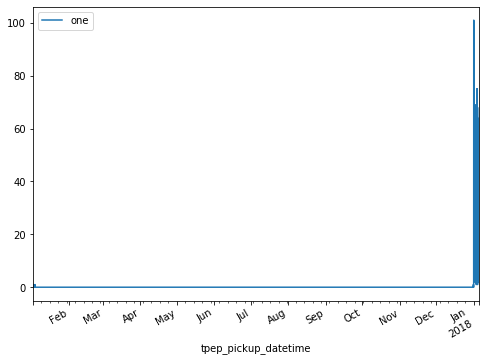

In [26]:
c.plot(subplots = True)

In [35]:
d = c['2018-01-05 00:00:00':]

In [36]:
d.head()

,one
tpep_pickup_datetime,
2018-01-05 00:00:00,14
2018-01-05 00:10:00,17
2018-01-05 00:20:00,10
2018-01-05 00:30:00,11
2018-01-05 00:40:00,8


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A122DB0908>],
      dtype=object)

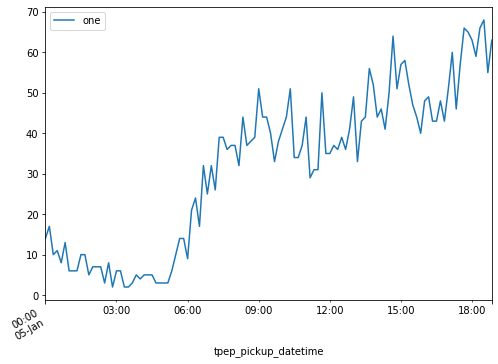

In [37]:
d.plot(subplots = True)